In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

# Generate Dummy Data
Since we're just proving the concept, we're going to create some random data in this block

In [7]:
# This block generates our random number selection
# Rerun this block every time you want to mix up the inputs
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

Just for posterity, let's plot that data so we can see it changing if we update the input.  We'll just add some data, see, happy little data points.  Since the underlying process for creating data is linear, we should expect to see a pretty straight clustering of points along the plot below.

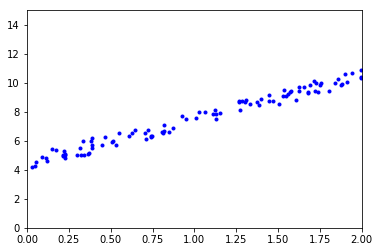

In [13]:
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# The Easy Way
This method below utilizes SciKit-Learn's LinearRegresson module.  We start with the raw data above, and then we'll fit a model to that data.  Once it's been fit to the data, we can then make predictions on the model.

Take note of how long it takes to run the training, this is what you can save by serializing and pickling that model structure, rather than re-training every time you need to make a prediction.

In [39]:
# Assign the LinearRegression function to 
lin_reg = LinearRegression()

# Pass our X and y values to the fit() function
lin_reg.fit(X, y)

# Print out the intercept of the slope and what the coefficient of the slope is
print("The intercept is {0}".format(lin_reg.intercept_))
print("The coefficient is {0}".format(lin_reg.coef_))

# Set a new value of X, as supplied by a user.  Alter this value to get a new value back
user_value = round(random.uniform(0.5, 1.5), 2)

# Predict the value of Y for a new value of X
print("If a user provides us \"{0}\", our model will predict {1}".format(user_value, lin_reg.predict(user_value)))


The intercept is [4.39931135]
The coefficient is [[3.08903335]]
If a user provides us "0.55", our model will predict [[6.0982797]]


# The Hard Way
This method below uses dot-matrix algebra in an example from an OReilly book.  In practice you wouldn't do it this way, but it's helpful for getting a sense of what's going on under the hood.

In [59]:
# Calculate the line of best fit with dot-matrix algebra
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# calculate the line of fit
theta_best

array([[4.59186817],
       [2.95888642]])

In [60]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.59186817],
       [10.50964101]])

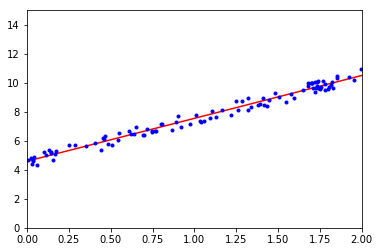

In [61]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()